In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
roughness_dir = "/Volumes/SEAGATE/roughness_apr2016_from_PH/roughness_predicted"
os.path.isdir(roughness_dir)

True

In [3]:
# path to training dataset

ds_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"

# in_csv = "myMethod_merged_april_2016_9cam_4bands_training_dataset.csv"
in_csv = "insample_19apr_lon200_220_oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime.csv"

In [4]:
# open/read input dataset

ds_fp = os.path.join(ds_dir, in_csv)
transect = pd.read_csv(ds_fp)
transect.shape

(6473, 15)

In [5]:
# select a smaller subset of transect, like the first 1000 points (or 10)

transect_small = transect.iloc[0:1000]
transect_small.head()

,Unnamed: 0,Unnamed: 0.1,#path,orbit,img_block,line,sample,lat,lon,an,ca,cf,rms,orbit_start,orbit_stop
0,1,5830,154,86893,13,18,874,78.777028,201.959473,0.577882,0.768202,1.160608,16.702500,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
1,2,5831,154,86893,13,17,874,78.775971,201.957275,0.545354,0.740519,1.152995,13.060000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
2,3,5832,154,86893,13,17,875,78.774650,201.954527,0.554351,0.743979,1.146074,12.275000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
3,4,5833,154,86893,13,17,876,78.772007,201.949024,0.571653,0.752976,1.170297,13.863333,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
4,5,5834,154,86893,13,16,876,78.770422,201.945720,0.561964,0.755052,1.150919,10.940000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00


## find roughess.dat files

In [10]:
roughness_in_pixel_list = []


for irow in range(transect_small.shape[0]):


    path = transect_small['#path'].iloc[irow]
    orbit = transect_small[' orbit'].iloc[irow]
    block = transect_small[' img_block'].iloc[irow]
    line = transect_small[' line'].iloc[irow]
    sample = transect_small[' sample'].iloc[irow]
    
#     path = transect_small['path'].iloc[irow]
#     orbit = transect_small['orbit'].iloc[irow]
#     block = transect_small['img_block'].iloc[irow]
#     line = transect_small['line'].iloc[irow]
#     sample = transect_small['sample'].iloc[irow]


    # zfill() path and string it
    if path < 100:
        path_str = str(path).zfill(3)
    else:
        path_str = str(path)


    # zfill() block and string it
    if block < 10:
        block_str = str(block).zfill(2)
    else:
        block_str = str(block)


    roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit)+"_B0"+block_str+".dat"
    print(roughness_file_pattern)

    # find roughness file
    rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))

    if (len(rough_file_list) < 1):
        raise ValueError("roughness list came out empty!")

    if (len(rough_file_list) > 1):
        raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")


    # find roughness and open it and change binary to array
    rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
    print(rough_2d_arr.shape)
    roughness_in_pixel = rough_2d_arr[line, sample]
    if roughness_in_pixel > 1:
        roughness_in_pixel_list.append(roughness_in_pixel)
    else:
        raise ValueError("why roughness is negative for an ATM location? model error? or something else?")


roughness_toa_refl_P154_O086893_B013.dat


ValueError: roughness list came out empty!

## plot transect

NameError: name 'plot' is not defined

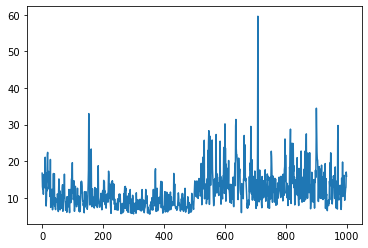

In [8]:
plt.plot(transect_small[' rms'], label="ATM-measured roughness")
# plt.plot(transect_small['rms'])

plot.plot(roughness_in_pixel_list, label="MISR-estimated roughness")

plt.legend("ATM and MISR-estimated")

## plot histogram

## statistics